In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Optimizing Linear Regression

### First prediction on random coefficients

In [2]:
# making up an artifical dataset 

X, y = make_regression(n_samples=1000, n_features=10, n_informative=2, noise=0.2, random_state=2)
print(X.shape, y.shape)

(1000, 10) (1000,)


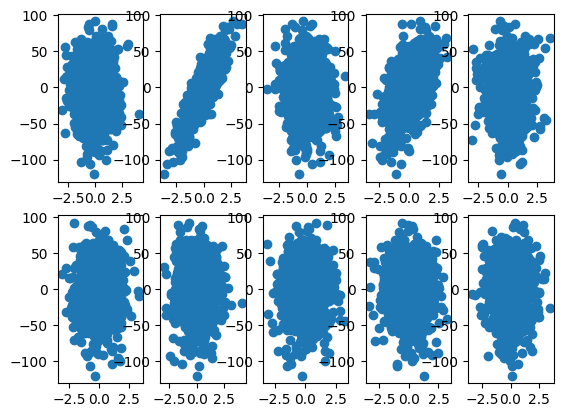

In [3]:
# quick visualisation

fig, axs = plt.subplots(2,5)
axs[0,0].scatter(X[:,0], y)
axs[0,1].scatter(X[:,1], y)
axs[0,2].scatter(X[:,2], y)
axs[0,3].scatter(X[:,3], y)
axs[0,4].scatter(X[:,4], y)
axs[1,0].scatter(X[:,5], y)
axs[1,1].scatter(X[:,6], y)
axs[1,2].scatter(X[:,7], y)
axs[1,3].scatter(X[:,8], y)
axs[1,4].scatter(X[:,9], y);

This data doesn't look very trustworthy ... 

In [4]:
# function to calculate a prediction for a single row, if coefficients are already given

def predict_row(row, coefficients):
    result = coefficients[-1] # adding the bias (last coefficient, since we will make one more as features we have)
    for i in range(len(row)): # adding the weights
        try:
            result += coefficients[i] * row[i]
        except:               # quick fix, since last row throws error otherwise
            pass
    return result


In [5]:
# function to generate predictions for a dataset of rows, if coefficients are already given

def predict_dataset(X, coefficients):
    yhats = []
    for row in X:
        yhat = predict_row(row, coefficients)
        yhats.append(yhat)
    return np.array(yhats)

In [6]:
# generating a random set of model coefficients

n_coeff = X.shape[1] + 1
coefficients = np.random.rand(n_coeff)
coefficients

array([0.29808922, 0.38468576, 0.37861671, 0.83451562, 0.97641125,
       0.02452422, 0.40703854, 0.76968868, 0.17193199, 0.55852901,
       0.16887237])

In [7]:
# generate predictions for our dataset, using those random coefficients

yhat = predict_dataset(X, coefficients)
yhat[:10] # first 10/1000 yhats

array([-0.29173848, -4.22582907,  0.11324502, -1.55230407,  0.56408964,
       -1.68567406,  1.07850719,  0.80727864,  2.23007041, -2.89243364])

In [8]:
# evaluating the mean squared error of these predictions

score = mean_squared_error(y, yhat)
print('MSE: %f' % score)

MSE: 1050.384182


In [9]:
# or, more efficiently: function that returns the error of a model

def objective(X, y, coefficients):
 yhat = predict_dataset(X, coefficients)
 score = mean_squared_error(y, yhat)
 return score

objective(X, y, coefficients)

1050.384181758008

### Simple optimisation method using Sum of Squared Residuals

In [10]:
# train test split, so we can evaluate if we actually generalised or just fit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [11]:
# implementing stochastic hill climbing algorithm

def hillclimbing(X, y, objective, solution, n_iter, step_size): # the first solution fed into the func will be the 
                                                                # randomnly generated coefficients
                                                                
    solution_eval = objective(X, y, solution) # evaluate the initial point
    for i in range(n_iter): # run the hill climb
        candidate = solution + np.random.randn(len(solution)) * step_size # take a step by adding new randomly generated coefficients * step_size
        candidte_eval = objective(X, y, candidate) # evaluate candidate point
        if candidte_eval <= solution_eval: # check if we should keep the new point
            solution, solution_eval = candidate, candidte_eval # store the new point
            #print('>%d %.5f' % (i, solution_eval))
    return [solution, solution_eval]

In [12]:
# using SSR optimisation on our data

n_iter = 2000
step_size = 0.15
n_coef = X.shape[1] + 1
solution = np.random.rand(n_coef)

coefficients, score = hillclimbing(X_train, y_train, objective, solution, n_iter, step_size)

print('Final Coefficients: %s' % coefficients)
print('')
print('Train MSE: %f' % (score))

Coefficients: [ 1.64775633e-02  2.82438198e+01  7.09640425e-02  1.69107502e+01
 -5.81941423e-02  3.53608886e-02 -1.37748680e-02 -3.26611212e-02
  4.62982374e-02  6.79132832e-02  1.21112890e-01]

Train MSE: 0.073913


In [13]:
# generate predictions for the test dataset and report the performance
yhat = predict_dataset(X_test, coefficients)
score = mean_squared_error(y_test, yhat)
print('Test MSE: %f' % (score))

Test MSE: 0.075036


### Optimising with SGD

First, let's gradient decent optimiser before making a stochastic gradient decent optimiser:

In [14]:
# function for gradient decent (batch_size = len(X) = 1000)

n_coeff = X.shape[1] + 1
coefficients = np.random.rand(n_coeff)

def grad_des(X, y, coefficients, alpha=0.1, epochs=10):
    batch_size = len(X)
    for epoch in range(epochs):
        for j in range(batch_size):
            yhats = predict_dataset(X, coefficients)
            for i in range(X.shape[1]):
                coefficients[i] -= (alpha/batch_size) * np.sum(-2*X[j, i]*(y[j]-yhats[j])) # updating slopes
            coefficients[10] -= (alpha/batch_size) * np.sum(-2*(y[j]-yhats[j])) # updating intercept
        weights_eval = objective(X, y, coefficients)
        print(weights_eval)
    return coefficients, weights_eval

In [15]:
# using gradient decent on our data

coefficients, last_score = grad_des(X_train, y_train, coefficients, alpha=0.1, epochs=20)

print('')
print(f'Final Coefficients: {coefficients}')
print('')
print(f'Train MSE: {last_score}')

692.2338465562224
460.56389721314605
306.72561454579176
204.47854029790025
136.45823915799215
91.1645618397842
60.97485443727826
40.83231655409689
27.379417967850998
18.38491578489913
12.364701870645513
8.33071082353124
5.624500408009575
3.806860210564574
2.5845237772779597
1.7614714843771135
1.2065445267086683
0.8318871611683291
0.5785834959034295
0.4070786715472633

Final Coefficients: [-4.19279530e-02  2.78472775e+01 -3.82063310e-02  1.64994915e+01
  5.06440549e-02 -6.60475584e-02 -2.01143070e-02  1.03402100e-01
 -8.83668296e-02 -1.37018317e-02 -4.70656467e-02]

Train MSE: 0.4070786715472633


In [16]:
# generate predictions for the test dataset and report the performance
yhat = predict_dataset(X_test, coefficients)
score = mean_squared_error(y_test, yhat)
print('Test MSE: %f' % (score))

Test MSE: 0.445704


The train and the test MSE are worse than for the SSR optimizer, but we only trained for 20 epochs here.